Find the best two EMA parameters for the following strategy: Buy if STO RSI < 0.8 and an ascending EMA crossover occurs; sell if STO RSI > 0.2 and a descending EMA crossover occurs. On BTC/USDT pair. Timeframe 2H.

In [1]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt

client=Client(tld='us')

klinesT = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_2HOUR, "15 March 2020", '2022-06-16')
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

In [20]:
del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])
#print(df)

In [21]:
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')

del df['timestamp']
print(df)

                         open      high       low     close        volume
timestamp                                                                
2020-03-15 00:00:00   5172.68   5268.54   5101.05   5148.32   10.55905400
2020-03-15 02:00:00   5152.91   5212.71   5147.92   5157.74    3.36524600
2020-03-15 04:00:00   5178.30   5283.83   5178.30   5248.91    3.64902100
2020-03-15 06:00:00   5283.85   5320.66   5254.03   5274.93    3.02476200
2020-03-15 08:00:00   5256.66   5261.88   5219.12   5257.84    2.58380300
...                       ...       ...       ...       ...           ...
2022-06-15 16:00:00  21410.17  21534.01  20495.06  21069.99  130.94497900
2022-06-15 18:00:00  21124.89  22410.58  20246.02  21634.10  583.90197400
2022-06-15 20:00:00  21623.66  22423.60  21455.65  22215.53   87.52183100
2022-06-15 22:00:00  22219.00  22784.93  22219.00  22594.59   98.27120300
2022-06-16 00:00:00  22573.55  22991.02  22361.52  22388.28   69.60655900

[9862 rows x 5 columns]


# 1. Between pre Bull run 2020 and post bear market 2022: 15 March 2020 to 15 June 2022

In [22]:
dfTest = df.copy()
dfTest = dfTest[:'2022-06-15']
dfTest['STOCH_RSI']=ta.momentum.stochrsi(dfTest['close'])
dfTest

,open,high,low,close,volume,STOCH_RSI
timestamp,,,,,,
2020-03-15 00:00:00,5172.68,5268.54,5101.05,5148.32,10.55905400,NaN
2020-03-15 02:00:00,5152.91,5212.71,5147.92,5157.74,3.36524600,NaN
2020-03-15 04:00:00,5178.30,5283.83,5178.30,5248.91,3.64902100,NaN
2020-03-15 06:00:00,5283.85,5320.66,5254.03,5274.93,3.02476200,NaN
2020-03-15 08:00:00,5256.66,5261.88,5219.12,5257.84,2.58380300,NaN
...,...,...,...,...,...,...
2022-06-15 14:00:00,21568.10,21763.67,21100.08,21417.47,94.58642300,0.932867
2022-06-15 16:00:00,21410.17,21534.01,20495.06,21069.99,130.94497900,0.768570
2022-06-15 18:00:00,21124.89,22410.58,20246.02,21634.10,583.90197400,1.000000


      i   j       result
117  43  65  1170.344338
131  46  65  1220.038539
118  43  68  1227.543126
130  46  62  1230.355030
52   31  68  1234.155564
..   ..  ..          ...
7    25  50  2505.412475
23   28  38  2785.635060
4    25  41  2972.196580
22   28  35  3156.953913
3    25  38  3209.184362

[153 rows x 3 columns]
Buy and hold result 4388.730692730833 USDT


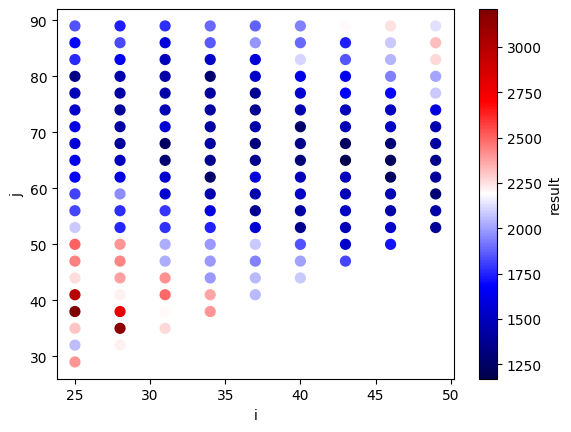

In [23]:
dt = pd.DataFrame(columns = ['i','j', 'result'])

for i in range(25,50,3):
  dfTest["EMA1"] = ta.trend.ema_indicator(dfTest["close"],i)
  for j in range(i+4,90,3):
    dfTest["EMA2"] = ta.trend.ema_indicator(dfTest["close"],j)
    dfTest["EMA_HISTO"] = dfTest["EMA1"] - dfTest["EMA2"]

    usdt = 1000
    coin = 0
    fee = 0.0007

    for index, row in dfTest.iterrows():
      #Buy
      if row['EMA_HISTO'] > 0 and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close'] - fee*usdt/row['close']
        usdt = 0
        #print("Buy ETH at ",df['close'][index]," || ",df['timestamp'][index])

      #SELL
      elif row['EMA_HISTO'] < 0 and row['STOCH_RSI'] > 0.2 and  coin > 0:
        usdt = coin*row["close"] - fee*coin*row['close']
        if usdt < 250: # Stop loss
          break
        coin = 0
        #print("Sell ETH at ",df['close'][index]," || ",df['timestamp'][index])

    myrow = {'i': i,'j': j, 'result': usdt + coin*dfTest.iloc[-1]['close']}
    dt.loc[len(dt)] = myrow

print(dt.sort_values(by=['result']))
print("Buy and hold result", (1000 / dfTest['close'].iloc[0]) * dfTest['close'].iloc[-1],'USDT')
dt.plot.scatter(x='i',y='j',c='result',s=50,colormap='seismic')
plt.show()

Best parameters: EMA 25 and EMA 38

Period : [2020-03-15 00:00:00] -> [2022-06-15 22:00:00]
Starting balance : 1000 $
Final balance : 3209.18 $
Performance vs US Dollar : 220.92 %
Buy and Hold Performence : 338.87 %
Performance vs Buy and Hold : -34.81 %
Number of negative trades :  62
Number of positive trades :  26
Average Positive Trades :  14 %
Average Negative Trades :  -3 %
Best trade +70.79 %, the  2021-01-11 16:00:00
Worst trade -10.52 %, the  2022-03-05 10:00:00
Worst drawBack -60.2 %
Total fee :  527.92 $


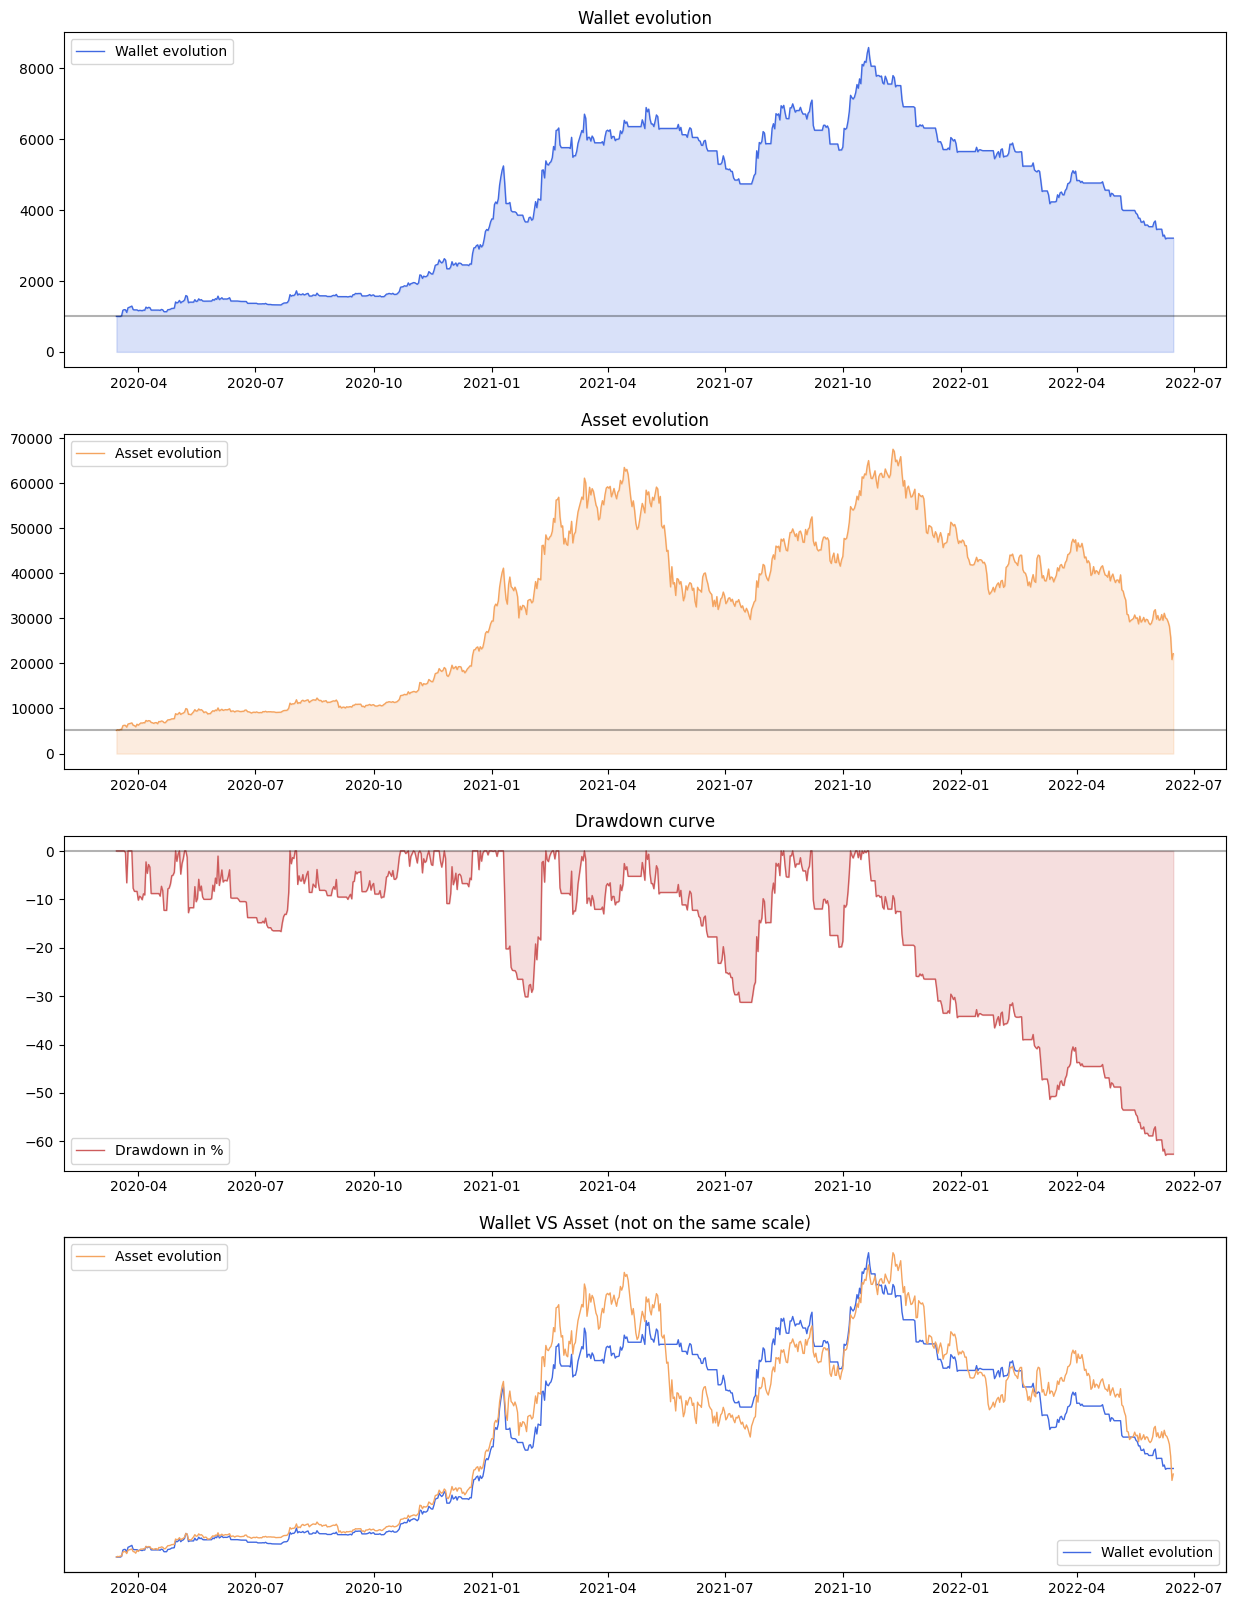

In [24]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])
days_history = []
previous_day = 0

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
fee = 0.0007

dfTest['EMA25']=ta.trend.ema_indicator(dfTest['close'], 25)
dfTest['EMA38']=ta.trend.ema_indicator(dfTest['close'], 38)

for index, row in dfTest.iterrows():
    #Keep track of the evolution of our portfolio each day for later analysis
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']})
    previous_day = current_day

    #Buy
    if row['EMA25'] > row['EMA38'] and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close']
        frais = fee * coin
        coin = coin - frais
        usdt = 0
        wallet = coin * row['close']
        if wallet > lastAth:
            lastAth = wallet
        #print("Buy COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    #Sell
    if row['EMA25'] < row['EMA38'] and row['STOCH_RSI'] > 0.2 and coin > 0:
        usdt = coin * row['close']
        frais = fee * usdt
        usdt = usdt - frais
        coin = 0
        wallet = usdt
        if wallet > lastAth:
            lastAth = wallet
        #print("Sell COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])
df_days['wallet_ath'] = df_days['wallet'].cummax()
df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

wallet = usdt + coin*dfTest.iloc[len(dfTest)-1]['close']
#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" + str(dfTest.index[-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None
#print(dt)

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].mean()),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].mean()),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(round(100*dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")
plot_wallet_vs_asset(df_days)

#dt[['wallet','price']].plot(subplots=True, figsize=(12,10))

# 2. Focus on bull run period. From 15 March 2020 to 15 November 2021

In [25]:
dfTest = df.copy()
dfTest = dfTest[:'2021-11-15']
dfTest['STOCH_RSI']=ta.momentum.stochrsi(dfTest['close'])
dfTest

,open,high,low,close,volume,STOCH_RSI
timestamp,,,,,,
2020-03-15 00:00:00,5172.68,5268.54,5101.05,5148.32,10.55905400,NaN
2020-03-15 02:00:00,5152.91,5212.71,5147.92,5157.74,3.36524600,NaN
2020-03-15 04:00:00,5178.30,5283.83,5178.30,5248.91,3.64902100,NaN
2020-03-15 06:00:00,5283.85,5320.66,5254.03,5274.93,3.02476200,NaN
2020-03-15 08:00:00,5256.66,5261.88,5219.12,5257.84,2.58380300,NaN
...,...,...,...,...,...,...
2021-11-15 14:00:00,65480.86,65495.91,64239.16,64295.94,29.66426600,0.000000
2021-11-15 16:00:00,64266.36,64435.09,63919.66,64033.03,24.51964100,0.000000
2021-11-15 18:00:00,64029.99,64301.32,63637.26,64251.14,14.12122000,0.114738


      i   j       result
117  43  65  2587.716292
131  46  65  2656.369756
132  46  68  2716.865718
130  46  62  2728.656039
52   31  68  2747.017101
..   ..  ..          ...
6    25  47  6645.997536
4    25  41  6676.944855
0    25  29  6829.479703
22   28  35  7036.541219
3    25  38  7282.787295

[153 rows x 3 columns]
Buy and hold result 12353.77171582186 USDT


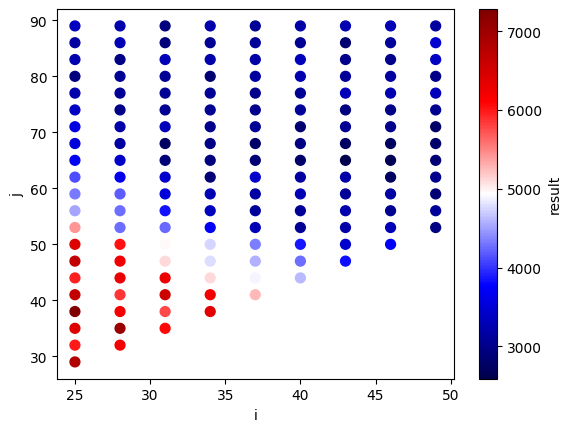

In [26]:
dt = None
dt = pd.DataFrame(columns = ['i','j', 'result'])

for i in range(25,50,3):
  dfTest["EMA1"] = ta.trend.ema_indicator(dfTest["close"],i)
  for j in range(i+4,90,3):
    dfTest["EMA2"] = ta.trend.ema_indicator(dfTest["close"],j)
    dfTest["EMA_HISTO"] = dfTest["EMA1"] - dfTest["EMA2"]

    usdt = 1000
    coin = 0
    fee = 0.0007

    for index, row in dfTest.iterrows():
      #Buy
      if row['EMA_HISTO'] > 0 and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close'] - fee*usdt/row['close']
        usdt = 0
        #print("Buy ETH at ",dfTest['close'][index]," || ", index, "coin ", coin)

      #SELL
      elif row['EMA_HISTO'] < 0 and row['STOCH_RSI'] > 0.2 and  coin > 0:
        usdt = coin*row["close"] - fee*coin*row['close']
        if usdt < 100:
          break
        coin = 0
        #print("Sell ETH at ",df['close'][index]," || ",index, "USDT ", usdt)


    myrow = {'i': i,'j': j, 'result': usdt + coin*dfTest.iloc[-1]['close']}
    dt.loc[len(dt)] = myrow
print(dt.sort_values(by=['result']))
print("Buy and hold result", (1000 / dfTest['close'].iloc[0]) * dfTest['close'].iloc[-1],'USDT')
dt.plot.scatter(x='i',y='j',c='result',s=50,colormap='seismic')
plt.show()

Best parameters: EMA 25 and EMA 38

Period : [2020-03-15 00:00:00] -> [2021-11-15 22:00:00]
Starting balance : 1000 $
Final balance : 7282.79 $
Performance vs US Dollar : 628.28 %
Buy and Hold Performence : 1135.38 %
Performance vs Buy and Hold : -44.66 %
Number of negative trades :  37
Number of positive trades :  22
Average Positive Trades :  16.0 %
Average Negative Trades :  -2.55 %
Best trade +70.79 %, the  2021-01-11 16:00:00
Worst trade -6.74 %, the  2021-09-08 08:00:00
Worst drawBack -26.0 %
Total fee :  336.02 $


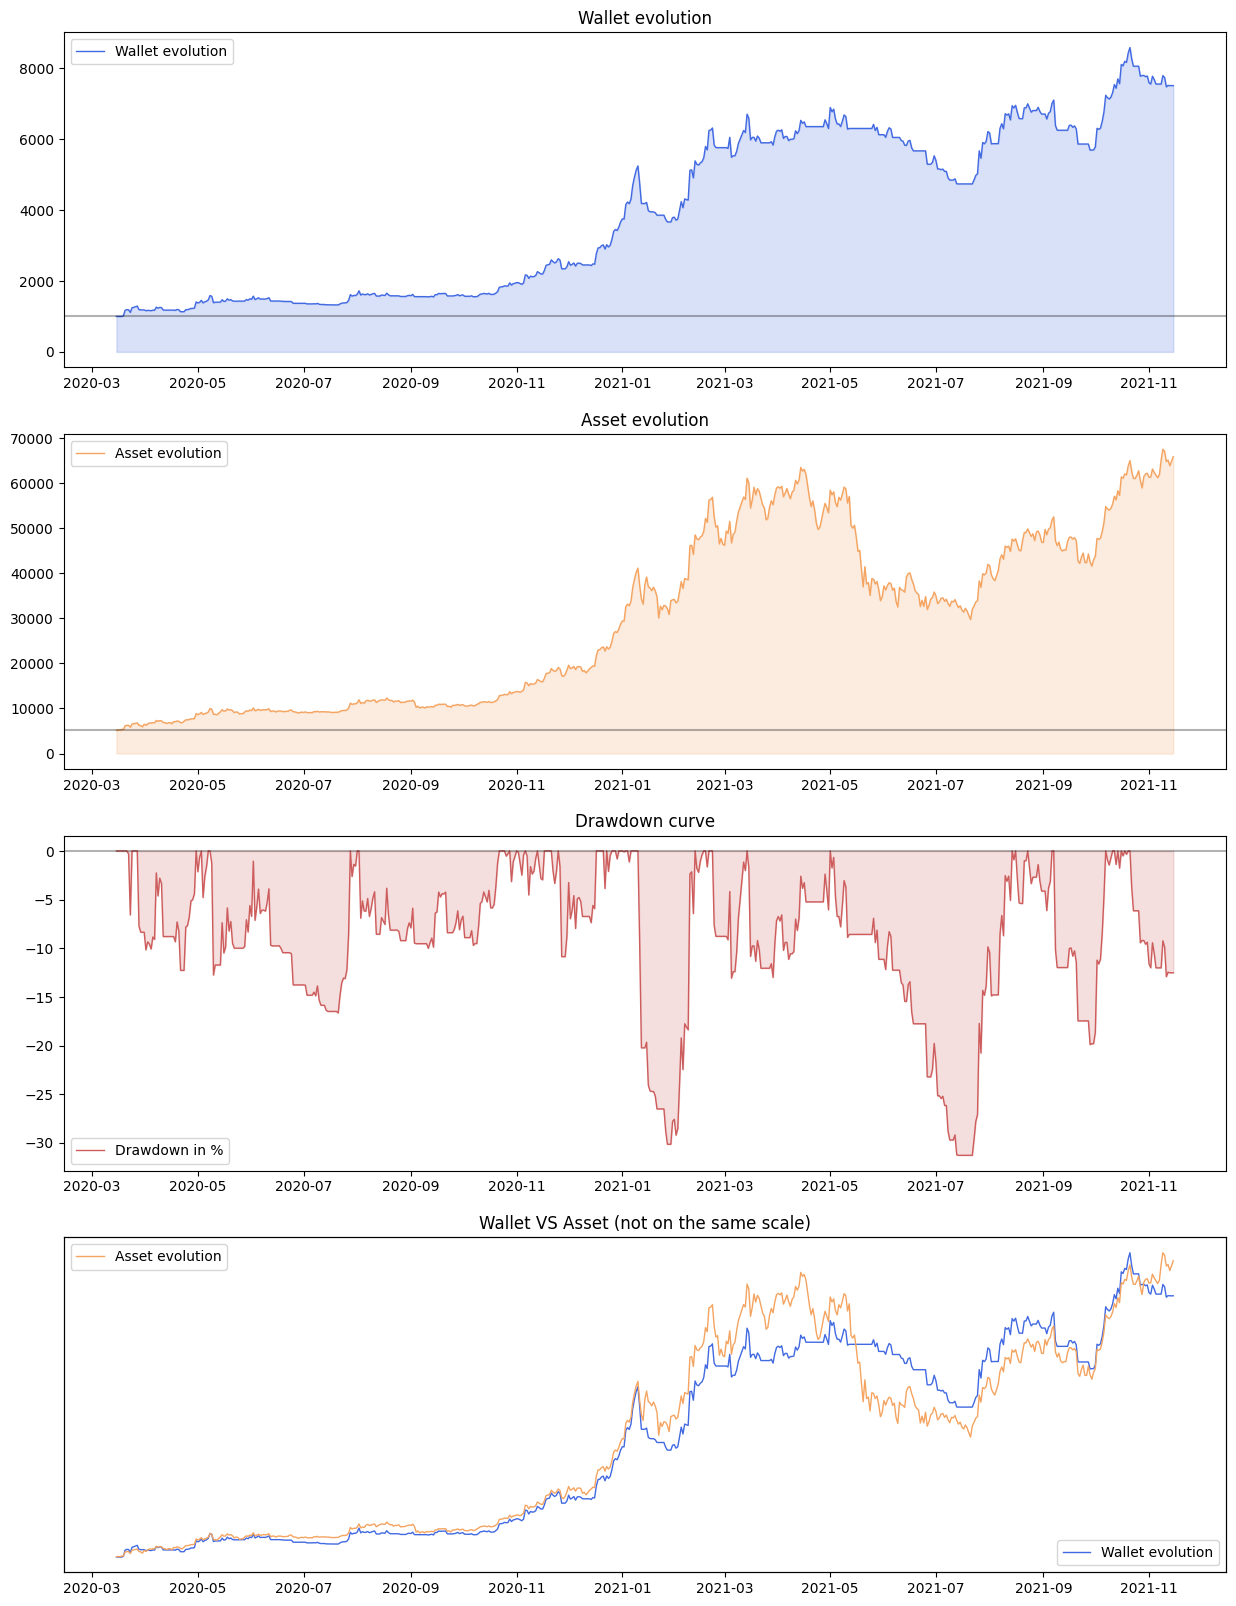

In [27]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])
days_history = []
previous_day = 0

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastIndex = df.first_valid_index()
fee = 0.0007

dfTest['EMA25']=ta.trend.ema_indicator(dfTest['close'], 25)
dfTest['EMA38']=ta.trend.ema_indicator(dfTest['close'], 38)

for index, row in dfTest.iterrows():
    #Keep track of the evolution of our portfolio each day for later analysis
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']})
    previous_day = current_day
    
    #Buy
    if row['EMA25'] > row['EMA38'] and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close']
        frais = fee * coin
        coin = coin - frais
        usdt = 0
        wallet = coin * row['close']
        if wallet > lastAth:
            lastAth = wallet
        #print("Buy COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    #Sell
    if row['EMA25'] < row['EMA38'] and row['STOCH_RSI'] > 0.2 and coin > 0:
        usdt = coin * row['close']
        frais = fee * usdt
        usdt = usdt - frais
        coin = 0
        wallet = usdt
        if wallet > lastAth:
            lastAth = wallet
        #print("Sell COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    lastIndex = index

df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])
df_days['wallet_ath'] = df_days['wallet'].cummax()
df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

wallet = usdt + coin*dfTest.iloc[len(dfTest)-1]['close']
#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" + str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)

dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")
plot_wallet_vs_asset(df_days)

#dt[['wallet','price']].plot(subplots=True, figsize=(12,10))

# 3. Focus on bear market period. From 15 November 2021 to 15 June 2022

In [28]:
dfTest = df.copy()
dfTest = dfTest['2021-11-15':'2022-06-15']
dfTest['STOCH_RSI']=ta.momentum.stochrsi(dfTest['close'])
dfTest

,open,high,low,close,volume,STOCH_RSI
timestamp,,,,,,
2021-11-15 00:00:00,65504.62,66191.12,65504.62,65857.58,29.96452500,NaN
2021-11-15 02:00:00,65920.30,65920.30,65611.50,65771.71,12.13103200,NaN
2021-11-15 04:00:00,65760.05,65907.52,65679.97,65701.70,22.92027700,NaN
2021-11-15 06:00:00,65701.70,65809.43,65487.09,65594.30,3.85328500,NaN
2021-11-15 08:00:00,65597.60,66323.84,65188.96,65957.98,21.09466000,NaN
...,...,...,...,...,...,...
2022-06-15 14:00:00,21568.10,21763.67,21100.08,21417.47,94.58642300,0.932867
2022-06-15 16:00:00,21410.17,21534.01,20495.06,21069.99,130.94497900,0.768570
2022-06-15 18:00:00,21124.89,22410.58,20246.02,21634.10,583.90197400,1.000000


      i   j      result
1    25  32  362.473794
0    25  29  370.164293
21   28  32  376.951781
2    25  35  378.717166
6    25  47  386.938160
..   ..  ..         ...
149  49  80  709.528454
125  43  89  711.180386
137  46  83  714.041777
152  49  89  721.564621
139  46  89  722.831765

[153 rows x 3 columns]
Buy and hold result 343.082603399639 USDT


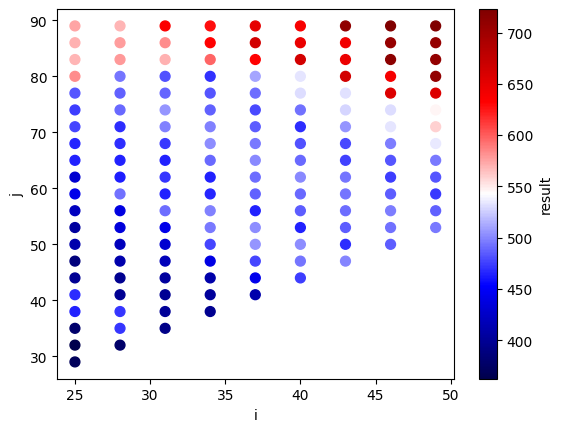

In [29]:
dt = None
dt = pd.DataFrame(columns = ['i','j', 'result'])
count = 0
for i in range(25,50,3):
  dfTest["EMA1"] = ta.trend.ema_indicator(dfTest["close"],i)
  for j in range(i+4,90,3):
    dfTest["EMA2"] = ta.trend.ema_indicator(dfTest["close"],j)
    dfTest["EMA_HISTO"] = dfTest["EMA1"] - dfTest["EMA2"]

    usdt = 1000
    coin = 0
    fee = 0.0007

    for index, row in dfTest.iterrows():
      #Buy
      if row['EMA_HISTO'] > 0 and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close'] - fee*usdt/row['close']
        usdt = 0
        #print("Buy ETH at ",dfTest['close'][index]," || ", index, "coin ", coin)

      #SELL
      elif row['EMA_HISTO'] < 0 and row['STOCH_RSI'] > 0.2 and  coin > 0:
        usdt = coin*row["close"] - fee*coin*row['close']
        if usdt < 100:
          break
        coin = 0
        #print("Sell ETH at ",df['close'][index]," || ",index, "USDT ", usdt)


    myrow = {'i': i,'j': j, 'result': usdt + coin*dfTest.iloc[-1]['close']}
    dt.loc[len(dt)] = myrow
print(dt.sort_values(by=['result']))
print("Buy and hold result", (1000 / dfTest['close'].iloc[0]) * dfTest['close'].iloc[-1],'USDT')
dt.plot.scatter(x='i',y='j',c='result',s=50,colormap='seismic')
plt.show()

Best parameters: EMA 46 and EMA 89

Period : [2021-11-15 00:00:00] -> [2022-06-15 22:00:00]
Starting balance : 1000 $
Final balance : 722.83 $
Performance vs US Dollar : -27.72 %
Buy and Hold Performence : -65.69 %
Performance vs Buy and Hold : -57.81 %
Number of negative trades :  9
Number of positive trades :  1
Average Positive Trades :  7.42 %
Average Negative Trades :  -4.2 %
Best trade +7.42 %, the  2022-04-07 00:00:00
Worst trade -9.7 %, the  2022-03-05 18:00:00
Worst drawBack -27.67 %
Total fee :  11.88 $


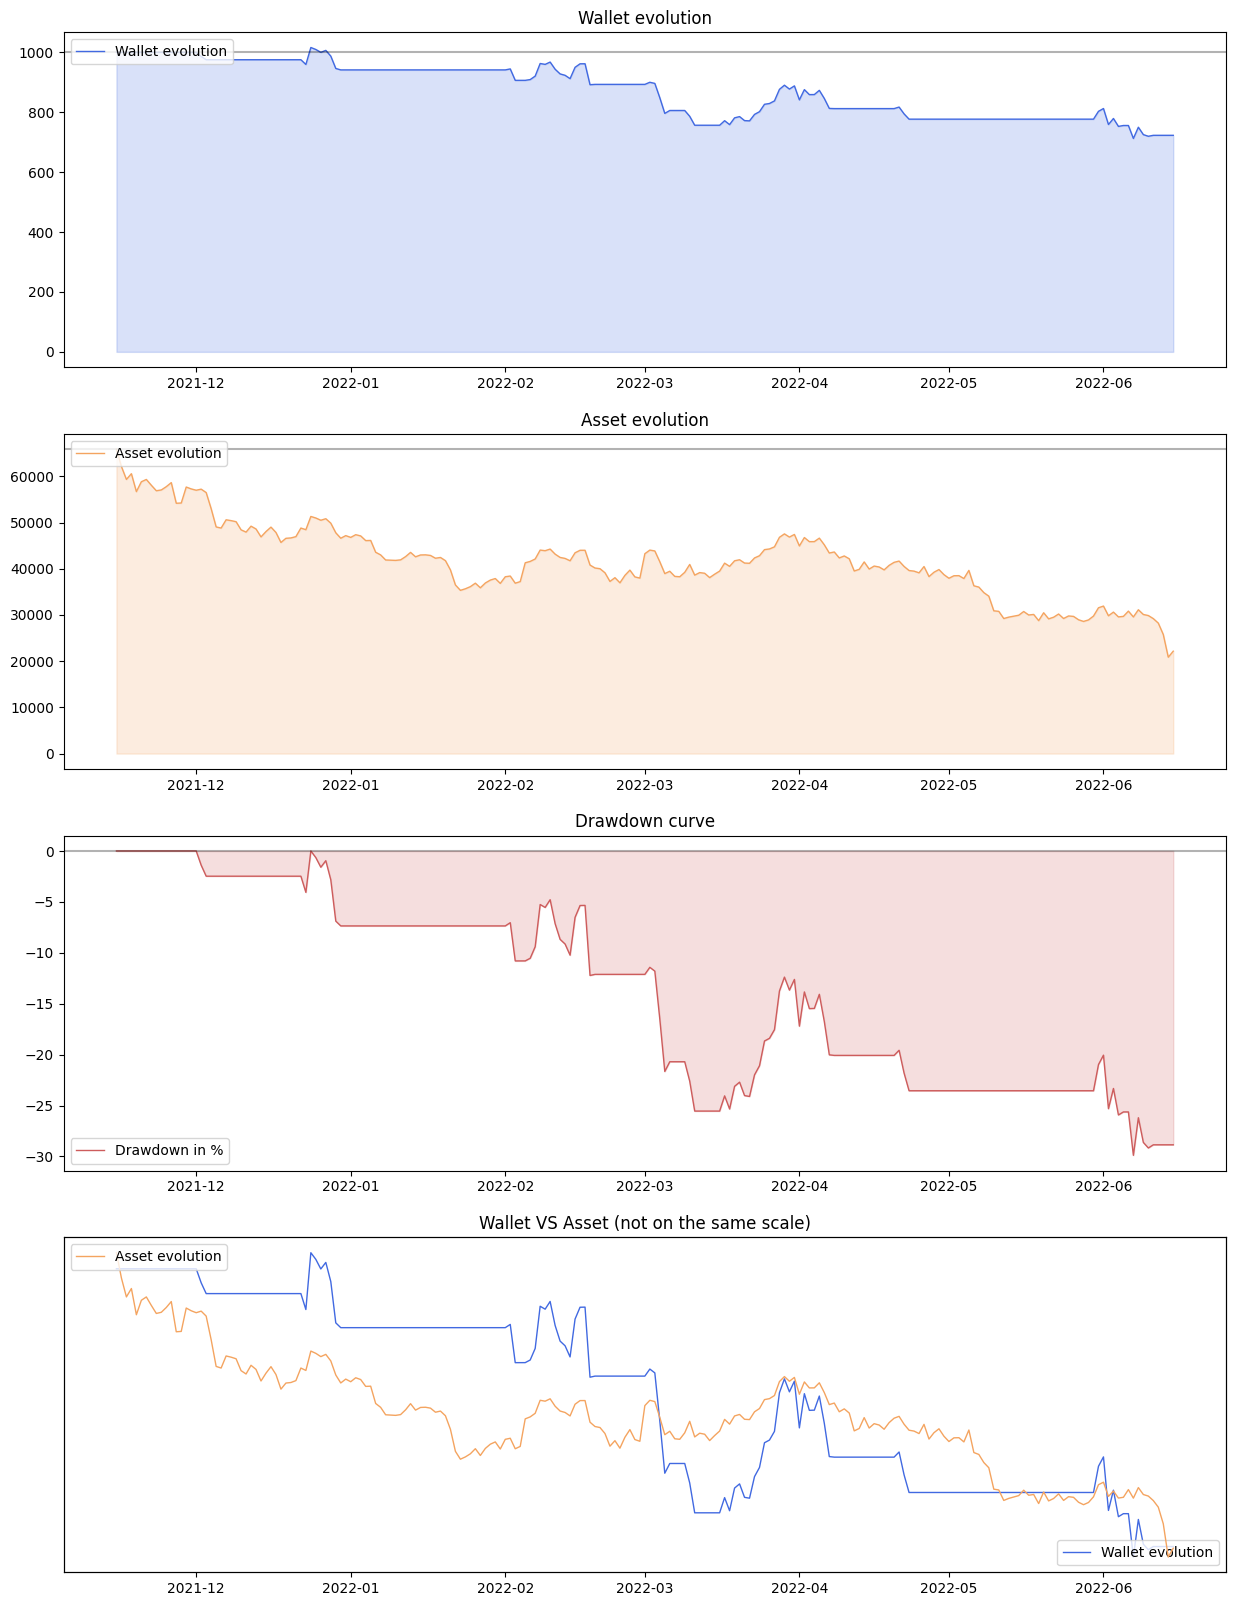

In [30]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])
days_history = []
previous_day = 0

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastIndex = df.first_valid_index()
fee = 0.0007

dfTest['EMA46']=ta.trend.ema_indicator(dfTest['close'], 46)
dfTest['EMA89']=ta.trend.ema_indicator(dfTest['close'], 89)

for index, row in dfTest.iterrows():
    #Keep track of the evolution of our portfolio each day for later analysis
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']})
    previous_day = current_day
    
    #Buy
    if row['EMA46'] > row['EMA89'] and row['STOCH_RSI'] < 0.8 and  usdt > 0:
        coin = usdt / row['close']
        frais = fee * coin
        coin = coin - frais
        usdt = 0
        wallet = coin * row['close']
        if wallet > lastAth:
            lastAth = wallet
        #print("Buy COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    #Sell
    if row['EMA46'] < row['EMA89'] and row['STOCH_RSI'] > 0.2 and coin > 0:
        usdt = coin * row['close']
        frais = fee * usdt
        usdt = usdt - frais
        coin = 0
        wallet = usdt
        if wallet > lastAth:
            lastAth = wallet
        #print("Sell COIN at",df['close'][index],'$ the', index)
        myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
        dt.loc[len(dt)] = myrow

    lastIndex = index

df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])
df_days['wallet_ath'] = df_days['wallet'].cummax()
df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

wallet = usdt + coin*dfTest.iloc[len(dfTest)-1]['close']
#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" + str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)

dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(round(100*dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")
plot_wallet_vs_asset(df_days)

#dt[['wallet','price']].plot(subplots=True, figsize=(12,10))

# Conclusion. Optimizing the parameters of the two EMAs leads to two key points: the best strategy does not outperform Buy & Hold during a bull run but outperforms it during a bear market.

In [31]:
def plot_wallet_vs_asset(df_days, log=False):
    days = df_days.copy()
    fig, ax_left = plt.subplots(figsize=(15, 20), nrows=4, ncols=1)

    ax_left[0].title.set_text("Wallet evolution")
    ax_left[0].plot(days['wallet'], color='royalblue', lw=1)
    if log:
        ax_left[0].set_yscale('log')
    ax_left[0].fill_between(days['wallet'].index, days['wallet'], alpha=0.2, color='royalblue')
    ax_left[0].axhline(y=days.iloc[0]['wallet'], color='black', alpha=0.3)
    ax_left[0].legend(['Wallet evolution'], loc ="upper left")

    ax_left[1].title.set_text("Asset evolution")
    ax_left[1].plot(days['price'], color='sandybrown', lw=1)
    if log:
        ax_left[1].set_yscale('log')
    ax_left[1].fill_between(days['price'].index, days['price'], alpha=0.2, color='sandybrown')
    ax_left[1].axhline(y=days.iloc[0]['price'], color='black', alpha=0.3)
    ax_left[1].legend(['Asset evolution'], loc ="upper left")

    ax_left[2].title.set_text("Drawdown curve")
    ax_left[2].plot(-days['drawdown_pct']*100, color='indianred', lw=1)
    ax_left[2].fill_between(days['drawdown_pct'].index, -days['drawdown_pct']*100, alpha=0.2, color='indianred')
    ax_left[2].axhline(y=0, color='black', alpha=0.3)
    ax_left[2].legend(['Drawdown in %'], loc ="lower left")

    ax_right = ax_left[3].twinx()
    if log:
        ax_left[3].set_yscale('log')
        ax_right.set_yscale('log')

    ax_left[3].title.set_text("Wallet VS Asset (not on the same scale)")
    ax_left[3].set_yticks([])
    ax_right.set_yticks([])
    ax_left[3].plot(days['wallet'], color='royalblue', lw=1)
    ax_right.plot(days['price'], color='sandybrown', lw=1)
    ax_left[3].legend(['Wallet evolution'], loc ="lower right")
    ax_right.legend(['Asset evolution'], loc ="upper left")